# Calculation of Angular Postural Parameters

### 1. Import relevant libraries

In [1]:
import cv2
import numpy as np 
from skimage import measure
import imutils
from imutils import contours
from matplotlib import pyplot as plt 

### 2. Crop image and apply Gaussian blur

In [2]:
img = cv2.imread("side.jpg")
original = img.copy()
img = img[:, :120]
color = img.copy()
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(img,(5,5),0)

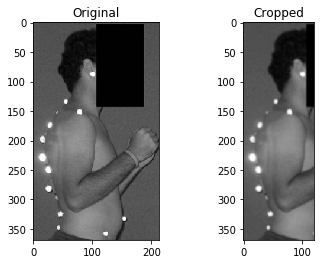

In [3]:
plt.subplot(1,2,1)
plt.imshow(original)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Cropped')
plt.show()

### 3. Thresholding and Dilation
Thresholding reduces the image to relevant areas of interest. Dilation is done for ease of spot detection.

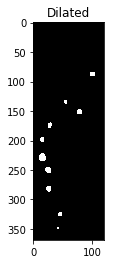

In [4]:
ret,img = cv2.threshold(img,230,255,cv2.THRESH_BINARY)
img  = cv2.dilate(img, None, iterations=1)
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Dilated')
plt.show()

### 4. Masking and Contour Detection

In [5]:
labels = measure.label(img, neighbors=8, background=0)
mask = np.zeros(img.shape, dtype="uint8")

for label in np.unique(labels):
    if(label==0):
        continue
        
    labelMask = np.zeros(img.shape, dtype="uint8")
    labelMask[labels==label] = 255
    numPixels = cv2.countNonZero(labelMask)
    
    if(numPixels>0):
        mask = cv2.add(mask, labelMask)
        
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = contours.sort_contours(cnts)[0]
contours = cnts

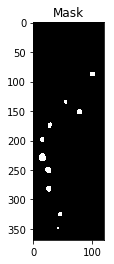

In [6]:
plt.imshow(img, cmap = plt.cm.gray)
plt.title('Mask')
plt.show()

### 5. Reduction of each marker to a single pixel
Each marker is reduced to a single pixel by averaging over the points corresponding to that marker

In [7]:
average_x = []
average_y = []

# Calculation of average x and y coordinates of the markers
for contour in contours:
    
    x,y = 0,0

    for point in contour:
    
        x = x + point[0][0]
        y = y + point[0][1]
  
    average_x.append(x/len(contour))
    average_y.append(y/len(contour))  
        
average_x, average_y = np.array(average_x), np.array(average_y)

### 6. (a) Thoracic Flexion Angle
The thoracic flexion angle is defined as the angle between the lines perpendicular to the C7 and T12 vertebrae. The code below locates these points and calculates the angle between the lines.

Thoracic Flexion Angle:  59.752441561048286  degrees


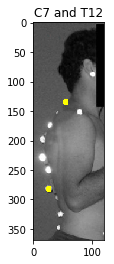

In [8]:
order = average_y.argsort()
average_x, average_y = average_x[order], average_y[order]

C7_1 = [average_x[1], color.shape[0] - average_y[1]]
C7_2 = [average_x[3], color.shape[0] - average_y[3]]

T12_1 = [average_x[7], color.shape[0] - average_y[7]]
T12_2 = [average_x[8], color.shape[0] - average_y[8]]

slope_C7 = -1/((C7_1[1] - C7_2[1])/(C7_1[0] - C7_2[0]))
slope_T12 = -1/((T12_1[1] - T12_2[1])/(T12_1[0] - T12_2[0]))

thoracic_angle = np.arctan((slope_T12-slope_C7)/(1 + slope_C7*slope_T12))*180/np.pi

thoracic = color.copy()

cv2.circle(thoracic, (int(average_x[1]),int(average_y[1])), 5, color=(255,255,0), thickness=-1)
cv2.circle(thoracic, (int(average_x[7]),int(average_y[7])), 5, color=(255,255,0), thickness=-1)

print("Thoracic Flexion Angle: ", thoracic_angle, " degrees")

plt.imshow(thoracic)
plt.title('C7 and T12')
plt.show()


### (b) Cranio-vertebral Angle
The cranio-vertebral angle is defined as the angle between the line joining the tragus of the ear with the C7 vertebra and the horizontal. The code below calculates the cranio-vertebral angle for the given image. 

Cranio-vertebral Angle:  45.53050131667381  degrees


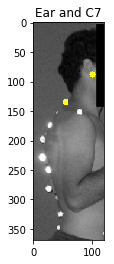

In [9]:
ear = [average_x[0], color.shape[0] - average_y[0]]
C7 = [average_x[1], color.shape[0] - average_y[1]]

slope_CV = (ear[1] - C7[1])/(ear[0] - C7[0])

cranio_vertebral_angle = np.arctan(slope_CV)*180/np.pi

cranio_vertebral = color.copy()

cv2.circle(cranio_vertebral, (int(average_x[0]),int(average_y[0])), 5, color=(255,255,0), thickness=-1)
cv2.circle(cranio_vertebral, (int(average_x[1]),int(average_y[1])), 5, color=(255,255,0), thickness=-1)

print("Cranio-vertebral Angle: ", cranio_vertebral_angle, " degrees")

plt.imshow(cranio_vertebral)
plt.title('Ear and C7')
plt.show()

### (c) Lumbar Angle
The lumbar angle is defined as the angle between the T12 and L5 markers. 

Lumbar Angle:  32.55569568865851  degrees


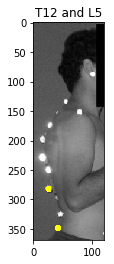

In [10]:
L5_1 = [average_x[-2], color.shape[0] - average_y[-2]]
L5_2 = [average_x[-1], color.shape[0] - average_y[-1]]

slope_L5 = -1/((L5_1[1] - L5_2[1])/(L5_1[0] - L5_2[0]))

lumbar_angle = np.arctan((slope_T12-slope_L5)/(1 + slope_L5*slope_T12))*180/np.pi

lumbar = color.copy()

cv2.circle(lumbar, (int(average_x[7]),int(average_y[7])), 5, color=(255,255,0), thickness=-1)
cv2.circle(lumbar, (int(average_x[9]),int(average_y[9])), 5, color=(255,255,0), thickness=-1)

print("Lumbar Angle: ", lumbar_angle, " degrees")

plt.imshow(lumbar)
plt.title('T12 and L5')
plt.show()
